<a href="https://colab.research.google.com/github/KSG2001/AI_Study/blob/Cafe/cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#카페운영

*   프로젝트 설명  
    :  인당 1잔씩 판매하여 하루매출을 계산한다. 하루 매출과 관리비를 빼 순수익을 내며 하루, 한달 전표를 작성한다.



*   카페메뉴(cafe_data)

  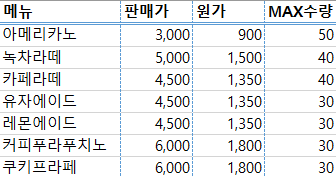



*   인벤토리      
    재료는 원두, 얼음, 녹차가루, 우유, 연유, 유자청, 레몬청, 탄산수, 쿠키, 일회용기가 들어있지만 메뉴에 따른 한 컵을 기준으로 재료 수요와 공급을 정한다.



*   관리비       
    가스비+수도세+전기세+렌탈비+임대료+인건비(일 6시간 1인 기준)+4대보험 총합을 
https://blog.naver.com/startupup/220178062212 을 참고하여 40만원으로 정하였다.




  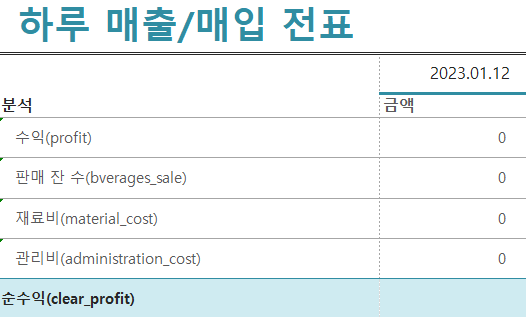

In [ ]:
from pandas import Series, DataFrame
import pandas as pd
import random

# 카페 메뉴

*   Menu : 카페에서 판매할 메뉴
*   Price : 메뉴당 판매 가격
*   cost : 메뉴당 원가
*   Max : 판매할 수 있는 최대 잔의 수
*   sell : 판매하고 남은 잔 수


In [ ]:
cafe_data = {'Menu': ["아메리카노", "녹차라테", "카페라테", "유자에이드","레몬에이드","커피프라푸치노","쿠키프라페"],
            'Price': [3000, 5000, 4500, 4500, 4500, 6000, 6000],
            'cost': [900, 1500, 1350, 1350, 1350, 1800, 1800],
             'Max':[50,40,40,30,30,30,30],
             'sell':[50,40,40,30,30,30,30]}

cafe_data = DataFrame(cafe_data)
print(cafe_data)

      Menu  Price  cost  Max  sell
0    아메리카노   3000   900   50    50
1     녹차라테   5000  1500   40    40
2     카페라테   4500  1350   40    40
3    유자에이드   4500  1350   30    30
4    레몬에이드   4500  1350   30    30
5  커피프라푸치노   6000  1800   30    30
6    쿠키프라페   6000  1800   30    30


#손님 함수

*   cafe_data의 각 열을 따로 orderer_이라는 변수에 받아옴.
*   orderer_Menu_Day는 하루 판매한 메뉴 전체를 뜻함.
*   orderer_after는 그 날 판매 후 판매 현황을 의미함.
*   g는 해당 손님의 순서를 뜻함.

In [ ]:
def day_customer(i):
  orderer_M= cafe_data['Menu']
  orderer_Price=cafe_data['Price']
  orderer_cost=cafe_data['cost']
  orderer_Max=cafe_data['Max']
  orderer_sell=cafe_data['sell']
  orderer_Menu_Day = []


  day_customer = random.randrange(100, 251)

  g=1
  
  while g <= day_customer:
    
    orderer_Menu= random.choice(orderer_M)
    orderer=[i for i in range(len(orderer_M)) if orderer_Menu in orderer_M[i]]
    orderer_sell_count=orderer_sell[orderer]-1
    orderer_not=[i for i in range(len(orderer_M)) if orderer_Menu not in orderer_M[i]]
    orderer_not_sell=orderer_sell[orderer_not]
    orderer_sell_not= orderer_not_sell.append(orderer_sell_count)
    orderer_sell=orderer_sell_not.sort_index()
    orderer_Menu_Day.append(orderer_Menu)
    for h in range(len(orderer_sell)):
      if orderer_sell[h]<0:
        orderer_sell_count=orderer_sell[orderer]+1
        orderer_not=[i for i in range(len(orderer_M)) if orderer_Menu not in orderer_M[i]]
        orderer_not_sell=orderer_sell[orderer_not]
        orderer_sell_not= orderer_not_sell.append(orderer_sell_count)
        orderer_sell=orderer_sell_not.sort_index()

        g -=1
        orderer_Menu_Day.pop()

    g+=1
  orderer_after=pd.concat([orderer_M]+[orderer_Price] +[orderer_cost]+ [orderer_Max]+[orderer_sell], axis=1)

  while True:
    remain=cafe_data['Max']-cafe_data['sell']
    cafe_data['sell']=cafe_data['sell']+remain
    break


  return orderer_Menu_Day, orderer_after

# 하루 매출 점표 출력 함수

*   each_Menu_count: 각 메뉴별 판매 잔수를 계산하기 위한 것. (Max 잔수에서 판매후 남은 잔수를 빼줌)
*   Menu는 메뉴 열을 리스트로 가져옴
*   Menu_count는 총 잔수를 저장한 변수 
*   7번째 줄은 아래의 data_append 함수를 실행시킨 후, 반환 값을 각 변수에 넣어줌
* data는 판다스 데이터 프레임 안에 넣을 함수를 불러온 것
* material_cost는 하루 재료 사용비를 저장한 변수
* administration_cost는 하루 총 관리비를 저장한 변수
* clear_profit는 순이익을 저장한 변수
* initial_funding 초기 자금을 뜻하며, 일차가 반복될 수록 초기자금 + 순이익에 해당하는 자금으로 초기화 됨
* 자금은 초기자금에서 순이익을 더한 금액

In [ ]:
def daily_scorecard(orderer_Menu_day, orderer_after, day, initial_funding):

  each_Menu_count = orderer_after["Max"] - orderer_after["sell"]
  Menu = orderer_after["Menu"]
  Menu_count = len(orderer_Menu_day)

  data, profit, material_cost, administration_cost,  clear_profit, initial_funding = data_append(Menu_count, each_Menu_count[0], each_Menu_count[1] , each_Menu_count[2] , each_Menu_count[3], each_Menu_count[4] , each_Menu_count[5] , each_Menu_count[6], day, initial_funding)
  
  print("-------------------%d day 매출 점표-------------------" %day)
  print("총 음료 판매 잔수: %d" %Menu_count)
  print("---------------------")
  print("각 음료 판매 잔수 ")
  for i in range(len(Menu)):
    print("%d" %(i+1) + ". " + Menu[i] + ": %d" %each_Menu_count[i])
  print("---------------------")  
  print("하루 총 수익: %d" %profit)
  print("하루 재료 사용비: %d" %material_cost)
  print("하루 총 관리비: %d" %administration_cost)
  print("하루 순이익: %d" %clear_profit)
  print("------------------------------------------------------")
  print("자금: %d" %initial_funding)
  print("------------------------------------------------------\n")
  
  return data, profit, material_cost, administration_cost, clear_profit, Menu_count, initial_funding

# 데이터 프레임에 추가할 매출 데이터를 제작하는 함수

* Price는 cafe_data 데이터 프레임의 Price부분 열 값을 가져온 후 그 값이 저장되어 있는 변수 (각 메뉴의 가격이 적혀 있음)
* cost는 cafe_data 데이터 프레임의 cost부분 열 값을 가져온 후 그 값이 저장되어 있는 변수 (각 메뉴의 재료 사용비가 적혀있음)
* profit 변수는 각 메뉴의 가격과 각 메뉴별 판매 잔수를 곱한 후 더한 값,  총 수익이 들어가있음
* materoal_cost에는 각 메뉴의 재료 사용비와 판매 잔수를 곱하여 더한 값이 들어가 있음, 총 재료 사용비 
* administration_cost 에는 하루 총 관리비가 들어있으며 이는 40만원으로 지정해 둠
* day = ~ day 가 저장되어있는 함수
* data는 데이터 프레임에 들어갈 내용을 append 가능한 형식으로 저장 
 
 ( 들어가는 내용: day, 하루 총 수익, 하루 총 판매 잔수, 하루 총 재료 사용비, 하루 총 관리비, 하루 총 순이익)
*return 되는 값: data, 총 수익, 재료 사용비, 하루 총 관리비, 순이익

In [ ]:
def data_append(beverages_count, Americano, Green_tea_latte , Cafe_Latte , Citron_ade, Lemonade , Coffee_frappuccino , Cookie_Frappe, day, initial_funding):

  Price = cafe_data['Price'].values.tolist()
  cost = cafe_data['cost'].values.tolist()

  profit = Americano * Price[0] + Green_tea_latte * Price[1] + Cafe_Latte * Price[2]  + Citron_ade * Price[3] + Lemonade * Price[4] + Coffee_frappuccino * Price[5] + Cookie_Frappe * Price[6]
  material_cost = Americano * cost[0] + Green_tea_latte * cost[1] + Cafe_Latte * cost[2]  + Citron_ade * cost[3] + Lemonade * cost[4] + Coffee_frappuccino * cost[5] + Cookie_Frappe * cost[6]
  administration_cost = 400000
  day = '%s Day' % day
  clear_profit = profit - material_cost - administration_cost

  initial_funding += clear_profit

  data = {
      
      'Day' : day,
      'Profit' : profit,
      'Beverages' : beverages_count,
      'Material' : material_cost,
      'Administration' : administration_cost,
      'Clear_Profit' : clear_profit,
      'Funding' : initial_funding,
  }

  return data, profit, material_cost, administration_cost, clear_profit, initial_funding

#첫번째 장사

In [ ]:
first_orderer_Menu_Day, first_orderer_after=day_customer(cafe_data)
for i in range(len(first_orderer_Menu_Day)):
  print("%d 번째 손님이 입장하십니다." %i)
  print("%s 메뉴 주문받았습니다." %first_orderer_Menu_Day[i])
  print("주문 감사합니다.\n")
  

print("오늘 하루 %d명의 손님이 방문을 해 주셨습니다.\n" %len(first_orderer_Menu_Day))  

0 번째 손님이 입장하십니다.
레몬에이드 메뉴 주문받았습니다.
주문 감사합니다.

1 번째 손님이 입장하십니다.
카페라테 메뉴 주문받았습니다.
주문 감사합니다.

2 번째 손님이 입장하십니다.
카페라테 메뉴 주문받았습니다.
주문 감사합니다.

3 번째 손님이 입장하십니다.
카페라테 메뉴 주문받았습니다.
주문 감사합니다.

4 번째 손님이 입장하십니다.
커피프라푸치노 메뉴 주문받았습니다.
주문 감사합니다.

5 번째 손님이 입장하십니다.
레몬에이드 메뉴 주문받았습니다.
주문 감사합니다.

6 번째 손님이 입장하십니다.
아메리카노 메뉴 주문받았습니다.
주문 감사합니다.

7 번째 손님이 입장하십니다.
녹차라테 메뉴 주문받았습니다.
주문 감사합니다.

8 번째 손님이 입장하십니다.
아메리카노 메뉴 주문받았습니다.
주문 감사합니다.

9 번째 손님이 입장하십니다.
녹차라테 메뉴 주문받았습니다.
주문 감사합니다.

10 번째 손님이 입장하십니다.
유자에이드 메뉴 주문받았습니다.
주문 감사합니다.

11 번째 손님이 입장하십니다.
아메리카노 메뉴 주문받았습니다.
주문 감사합니다.

12 번째 손님이 입장하십니다.
녹차라테 메뉴 주문받았습니다.
주문 감사합니다.

13 번째 손님이 입장하십니다.
커피프라푸치노 메뉴 주문받았습니다.
주문 감사합니다.

14 번째 손님이 입장하십니다.
유자에이드 메뉴 주문받았습니다.
주문 감사합니다.

15 번째 손님이 입장하십니다.
아메리카노 메뉴 주문받았습니다.
주문 감사합니다.

16 번째 손님이 입장하십니다.
쿠키프라페 메뉴 주문받았습니다.
주문 감사합니다.

17 번째 손님이 입장하십니다.
유자에이드 메뉴 주문받았습니다.
주문 감사합니다.

18 번째 손님이 입장하십니다.
카페라테 메뉴 주문받았습니다.
주문 감사합니다.

19 번째 손님이 입장하십니다.
쿠키프라페 메뉴 주문받았습니다.
주문 감사합니다.

20 번째 손님이 입장하십니다.
레몬에이드 메뉴 주문받았습니다.
주문 감사합니다.

21 번째 손님이 입장하십니다.
아메리카노 메뉴

#두번째 장사

In [ ]:
Second_orderer_Menu_Day, Second_orderer_after=day_customer(cafe_data)
for i in range(len(Second_orderer_Menu_Day)):
  print("%d 번째 손님이 입장하십니다." %i)
  print("%s 메뉴 주문받았습니다." %Second_orderer_Menu_Day[i])
  print("주문 감사합니다.\n")
  


print("오늘 하루 %d명의 손님이 방문을 해 주셨습니다.\n" %len(Second_orderer_Menu_Day))  

0 번째 손님이 입장하십니다.
커피프라푸치노 메뉴 주문받았습니다.
주문 감사합니다.

1 번째 손님이 입장하십니다.
아메리카노 메뉴 주문받았습니다.
주문 감사합니다.

2 번째 손님이 입장하십니다.
녹차라테 메뉴 주문받았습니다.
주문 감사합니다.

3 번째 손님이 입장하십니다.
레몬에이드 메뉴 주문받았습니다.
주문 감사합니다.

4 번째 손님이 입장하십니다.
쿠키프라페 메뉴 주문받았습니다.
주문 감사합니다.

5 번째 손님이 입장하십니다.
카페라테 메뉴 주문받았습니다.
주문 감사합니다.

6 번째 손님이 입장하십니다.
녹차라테 메뉴 주문받았습니다.
주문 감사합니다.

7 번째 손님이 입장하십니다.
녹차라테 메뉴 주문받았습니다.
주문 감사합니다.

8 번째 손님이 입장하십니다.
쿠키프라페 메뉴 주문받았습니다.
주문 감사합니다.

9 번째 손님이 입장하십니다.
레몬에이드 메뉴 주문받았습니다.
주문 감사합니다.

10 번째 손님이 입장하십니다.
레몬에이드 메뉴 주문받았습니다.
주문 감사합니다.

11 번째 손님이 입장하십니다.
유자에이드 메뉴 주문받았습니다.
주문 감사합니다.

12 번째 손님이 입장하십니다.
유자에이드 메뉴 주문받았습니다.
주문 감사합니다.

13 번째 손님이 입장하십니다.
아메리카노 메뉴 주문받았습니다.
주문 감사합니다.

14 번째 손님이 입장하십니다.
카페라테 메뉴 주문받았습니다.
주문 감사합니다.

15 번째 손님이 입장하십니다.
아메리카노 메뉴 주문받았습니다.
주문 감사합니다.

16 번째 손님이 입장하십니다.
카페라테 메뉴 주문받았습니다.
주문 감사합니다.

17 번째 손님이 입장하십니다.
커피프라푸치노 메뉴 주문받았습니다.
주문 감사합니다.

18 번째 손님이 입장하십니다.
유자에이드 메뉴 주문받았습니다.
주문 감사합니다.

19 번째 손님이 입장하십니다.
커피프라푸치노 메뉴 주문받았습니다.
주문 감사합니다.

20 번째 손님이 입장하십니다.
유자에이드 메뉴 주문받았습니다.
주문 감사합니다.

21 번째 손님이 입장하십니다.
아메리카노

# 한달간 하루 매출 점표 및 한달 매출점표

* Total_sales 한달 매출 점표가 저장될 전체 데이터 프레임 생성
* 각 변수 앞에 Monthly가 붙은 변수는 한달 총 매출 점표에 쓰이는 변수들이며, 각 day마다 그 변수에 해당되는 값을 더한 값이 저장되어 있음

* Day: 시작후 날짜  
* Profit: 수익 
* Beverages: 판매잔 수 
* Material: 원가 
* Administration: 관리비 
* Clear_Profit: 순이익   
* Funding: 자금 (초기자금 + 순이익)

In [ ]:
Total_sales = pd.DataFrame(columns=['Day', 'Profit','Beverages','Material','Administration','Clear_Profit', 'Funding'])

initial_funding = -10000000

# 첫쨋날 하루 점표
first_data, first_profit, first_material_cost, first_administration_cost, first_clear_profit, first_Menu_count, first_initial_funding = daily_scorecard(first_orderer_Menu_Day, first_orderer_after,1 , initial_funding)
Total_sales = Total_sales.append(first_data, ignore_index=True)

# 둘쨋날 하루 점표
Second_data, Second_profit, Second_material_cost, Second_administration_cost, Second_clear_profit, Second_Menu_count, Second_initial_funding = daily_scorecard(Second_orderer_Menu_Day, Second_orderer_after,2, initial_funding)
Total_sales = Total_sales.append(Second_data, ignore_index=True)

Monthly_profit = first_profit + Second_profit
Monthly_beverages_sale = first_Menu_count + Second_Menu_count
Monthly_material_cost = first_material_cost + Second_material_cost
Monthly_administration_cost = first_administration_cost + Second_administration_cost
Monthly_clear_profit = first_clear_profit + Second_clear_profit


for i in range(3,32):

  day = i
  orderer_Menu_day, orderer_after = day_customer(cafe_data)

  data, profit, material_cost, administration_cost, clear_profit, Menu_count, initial_funding = daily_scorecard(orderer_Menu_day, orderer_after,day, initial_funding)
  Total_sales = Total_sales.append(data, ignore_index=True)

  # 한달 매출 점표에 필요한 것
  Monthly_profit += profit
  Monthly_beverages_sale += Menu_count
  Monthly_material_cost += material_cost
  Monthly_administration_cost += administration_cost
  Monthly_clear_profit += clear_profit

Total_sales.set_index('Day',inplace=True)

print("\n-----------------------------한달 총 매출 점표---------------------------")
print(Total_sales)
print("-------------------------------------------------------------------------")
print("한달 총수익: %s \n한달 총 음료 판매수: %s \n한달 총 재료 사용비: %s \n한달 총 관리비: %s \n한달 순이익: %s \n한달 총 자금: %s" %(Monthly_profit, Monthly_beverages_sale, Monthly_material_cost, Monthly_administration_cost, Monthly_clear_profit, initial_funding))
print("-------------------------------------------------------------------------")

-------------------1 day 매출 점표-------------------
총 음료 판매 잔수: 129
---------------------
각 음료 판매 잔수 
1. 아메리카노: 22
2. 녹차라테: 15
3. 카페라테: 18
4. 유자에이드: 22
5. 레몬에이드: 22
6. 커피프라푸치노: 14
7. 쿠키프라페: 16
---------------------
하루 총 수익: 600000
하루 재료 사용비: 180000
하루 총 관리비: 400000
하루 순이익: 20000
------------------------------------------------------
자금: -9980000
------------------------------------------------------

-------------------2 day 매출 점표-------------------
총 음료 판매 잔수: 180
---------------------
각 음료 판매 잔수 
1. 아메리카노: 28
2. 녹차라테: 24
3. 카페라테: 30
4. 유자에이드: 25
5. 레몬에이드: 27
6. 커피프라푸치노: 27
7. 쿠키프라페: 19
---------------------
하루 총 수익: 849000
하루 재료 사용비: 254700
하루 총 관리비: 400000
하루 순이익: 194300
------------------------------------------------------
자금: -9805700
------------------------------------------------------

-------------------3 day 매출 점표-------------------
총 음료 판매 잔수: 250
---------------------
각 음료 판매 잔수 
1. 아메리카노: 50
2. 녹차라테: 40
3. 카페라테: 40
4. 유자에이드: 30
5. 레몬에이드: 30
6. 커피프라푸치노: 30
7. 쿠키프라페: 30
----